In [1]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# TODO why mxnet?
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet.gluon.data.vision import transforms

In [3]:
# import matplotlib.pyplot as plt
# import mxnet as mx
# import torchvision.transforms as transforms

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/Torch/chap05/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Torch/chap05


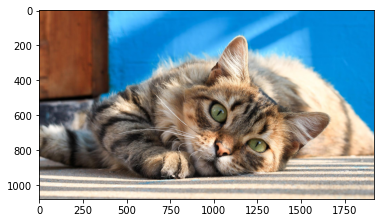

In [5]:
example_image = mx.image.imread("cat.jpg")
plt.imshow(example_image.asnumpy())
plt.show()

In [6]:
print(f"type(example_image) : {type(example_image)}")
print(f"example_image.size : {example_image.size}")

type(example_image) : <class 'mxnet.ndarray.ndarray.NDArray'>
example_image.size : 6220800


In [7]:
def show_images(imgs, num_rows, num_cols, scale=2): 
    aspect_ratio = imgs[0].shape[0] / imgs[0].shape[1]
    figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace=0.1, wspace=0)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=3):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

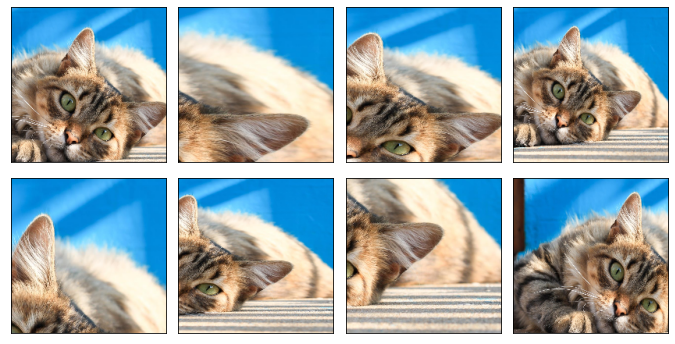

In [8]:
shape_aug = transforms.RandomResizedCrop(size=(200, 200),
                                         scale=(0.1, 1),
                                         ratio=(0.5, 2))
apply(example_image, shape_aug)